In [1]:
from nam.config import defaults
from nam.data import FoldedDataset, NAMDataset
from nam.models import NAM, get_num_units
from nam.trainer import LitNAM
from nam.utils import *
import pandas as pd
import pytorch_lightning as pl 
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint

config = defaults()
config.num_epochs = 10

print(config)

#Config(activation='exu', batch_size=1024, cross_val=False, data_path='data/GALLUP.csv', decay_rate=0.995, device='cpu', dropout=0.5, early_stopping_patience=50, experiment_name='NAM', feature_dropout=0.5, fold_num=1, hidden_sizes=[64, 32], l2_regularization=0.5, logdir='output', lr=0.0003, num_basis_functions=1000, num_epochs=1, num_folds=5, num_models=1, num_splits=3, num_workers=16, optimizer='adam', output_regularization=0.5, regression=False, save_model_frequency=2, save_top_k=3, seed=2021, shuffle=True, units_multiplier=2, use_dnn=False, wandb=True)


config.regression = True



Config(activation='exu', batch_size=128, cross_val=False, data_path='data/GALLUP.csv', decay_rate=0.995, device='cpu', dropout=0.1, early_stopping_patience=50, experiment_name='NAM', feature_dropout=0.1, fold_num=1, hidden_sizes=[], l2_regularization=0.1, logdir='output', lr=0.01, num_basis_functions=1000, num_epochs=10, num_folds=5, num_models=1, num_splits=3, num_workers=16, output_regularization=0.1, regression=False, save_model_frequency=2, save_top_k=3, seed=2021, shuffle=True, units_multiplier=2, use_dnn=False, wandb=False)


In [2]:
import csv
import numpy as np
import pandas as pd
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

np.random.seed(0)

bs=2 #This is the square root of the number of betas. Square root for plotting convenience
obs=10000 #Number of obs
const=5 #Constant a in y=a+beta*x+e
badd=1 #Multiplies the normally distributed random betas by a constant
eadd=1.7

#Creating the real underlying data
x=np.random.normal(size=[obs,bs**2])
errors=eadd*np.random.normal(size=[obs])
beta=np.array([0.5,-0.5,0.2,2.5])#badd*np.random.normal(size=[bs**2])
y=(const+np.matmul(np.sin(5*x),beta)+errors)


In [3]:
x1=pd.DataFrame(x,columns=["x1","x2","x3","x4"])
y1=pd.DataFrame(y,columns=["y"])
frames=[x1,y1]
result = pd.concat(frames,axis=1)

In [4]:
config = defaults()
config.num_epochs=10
config.regression = True

dataset = NAMDataset(config,
                      data_path=result,
                      features_columns=result.columns[:-1],
                      targets_column=result.columns[-1])


## Getting the training dataloaders
dataloaders = dataset.train_dataloaders()

In [5]:
model = NAM(
  config=config,
  name="NAM_SIM",
  num_inputs=len(dataset[0][0]),
  num_units=get_num_units(config, dataset.features),
)



C:\Users\morte\anaconda3\lib\site-packages\torch\nn\init.py:172: UserWarning: mean is more than 2 std from [a, b] in nn.init.trunc_normal_. The distribution of values may be incorrect.
  return _no_grad_trunc_normal_(tensor, mean, std, a, b)


In [6]:
from nam.trainer import Trainer
config.wandb = False
trainer = Trainer(config, model, dataset)
trainer.train()

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Session not detected. You should not be calling `report` outside `tune.run` or while using the class API. 
  File "C:\Users\morte\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\morte\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\morte\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\morte\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\morte\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "C:\Users\morte\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\morte\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
    self._run_once()
  File "C:\Users\morte\anaconda3\lib\asyncio\ba

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

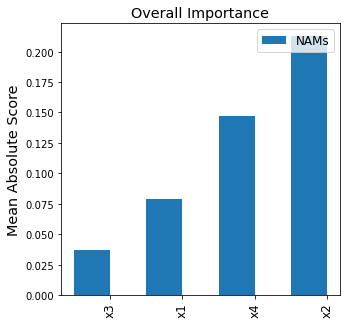

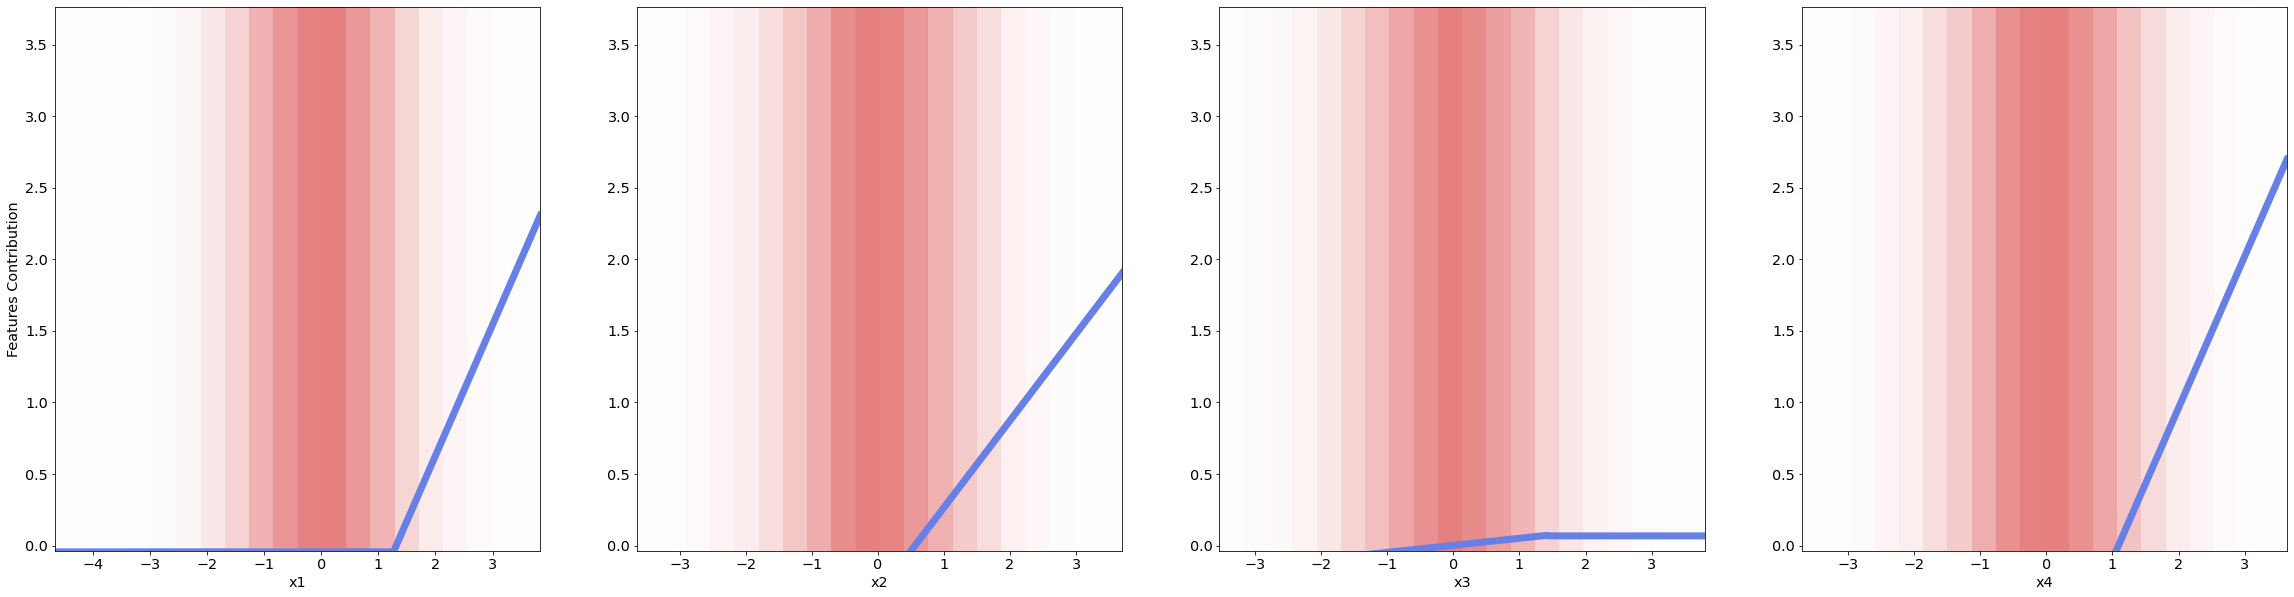

In [7]:
fig1 = plot_mean_feature_importance(model, dataset)

fig2 = plot_nams(model, dataset, num_cols= 4)


In [11]:
beta

array([ 0.06604101,  1.69998216, -1.61921647, -0.59637661])

In [10]:
import csv
import numpy as np
from interpret.glassbox import ExplainableBoostingClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from interpret import show
from interpret.data import Marginal
from interpret.glassbox import ExplainableBoostingRegressor, LinearRegression, RegressionTree
from interpret.perf import RegressionPerf
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

np.random.seed(0)

ebm = ExplainableBoostingClassifier()

In [11]:
#Estimating the GAMs
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)

marginal = Marginal().explain_data(X_train, Y_train, name = 'Train Data')
ebm = ExplainableBoostingRegressor()
ebm.fit(X_train, Y_train)  

ebm_perf = RegressionPerf(ebm.predict).explain_perf(X_test, Y_test, name='EBM')
ebm_global = ebm.explain_global(name='EBM')

In [12]:
show(ebm_global)

C:\Users\morte\anaconda3\lib\site-packages\interpret\visual\udash.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\morte\anaconda3\lib\site-packages\interpret\visual\udash.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\morte\anaconda3\lib\site-packages\interpret\visual\udash.py:7: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table as dt


<!-- http://127.0.0.1:7001/2229259913872/ -->